<a href="https://colab.research.google.com/github/Yash12100/Data_science/blob/master/sound_kaggle_MIR(music_information_retrival).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile
import pandas as pd
#!pip install soundfile
import numpy as np
import librosa
import librosa.display
import random
from sklearn.preprocessing import LabelEncoder
import keras
#import soundfile as sf

Using TensorFlow backend.


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashchhabra","key":"28d0712ba3f7d41896368caa439349fd"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#os.chdir('/content/.kaggle/yash')
if os.path.isdir("/content/.kaggle/yash/sound") == False:
  os.makedirs('/content/.kaggle/yash/sound')

In [0]:
#os.chdir('/content/.kaggle/yash/sound')
#os.getcwd()
#os.unlink('urban-sound-classification.zip')


In [0]:
!kaggle datasets download -d pavansanagapati/urban-sound-classification

100% 5.56G/5.57G [02:37<00:00, 38.2MB/s]
100% 5.57G/5.57G [02:37<00:00, 37.9MB/s]


In [0]:
!ls

kaggle.json  sample_data  urban-sound-classification.zip


In [0]:
zipref= zipfile.ZipFile('urban-sound-classification.zip', 'r')
zipref.extractall()
zipref.close()

In [0]:
!ls

img.zip      sample_data  test.zip   train.zip
kaggle.json  test.csv	  train.csv  urban-sound-classification.zip


In [0]:
def unzipping(file_name):
  zipref=zipfile.ZipFile(file_name,'r')
  zipref.extractall()
  zipref.close()


In [0]:
unzipping('train.zip')

In [0]:
unzipping('test.zip')
unzipping('img.zip')

In [0]:
!ls

img	     sample_data  test.zip   train.zip
img.zip      Test	  Train      urban-sound-classification.zip
kaggle.json  test.csv	  train.csv


In [0]:
os.getcwd()

'/content'

In [0]:
train_db= pd.read_csv('train.csv')
test_db= pd.read_csv('test.csv')
print(train_db.head(5))
print(test_db.head(5))
print(train_db['Class'].unique())

   ID         Class
0   0         siren
1   1  street_music
2   2      drilling
3   3         siren
4   4      dog_bark
   ID
0   5
1   7
2   8
3   9
4  13
['siren' 'street_music' 'drilling' 'dog_bark' 'children_playing'
 'gun_shot' 'engine_idling' 'air_conditioner' 'jackhammer' 'car_horn']


In [0]:
train_db['file_path']= train_db['ID'].map(lambda x : '/content/.kaggle/yash/sound' +'/'+'Train/'+str(x)+'.wav')
train_db.head(5)

,ID,Class,file_path
0,0,siren,/content/.kaggle/yash/sound/Train/0.wav
1,1,street_music,/content/.kaggle/yash/sound/Train/1.wav
2,2,drilling,/content/.kaggle/yash/sound/Train/2.wav
3,3,siren,/content/.kaggle/yash/sound/Train/3.wav
4,4,dog_bark,/content/.kaggle/yash/sound/Train/4.wav


In [0]:
y, s =librosa.load('/content/Train/2.wav', duration=1)
print(len(y), s)

22050 22050


In [0]:
from IPython.display import Audio
Audio(data=y,rate=s)

NameError: ignored

(128, 44)

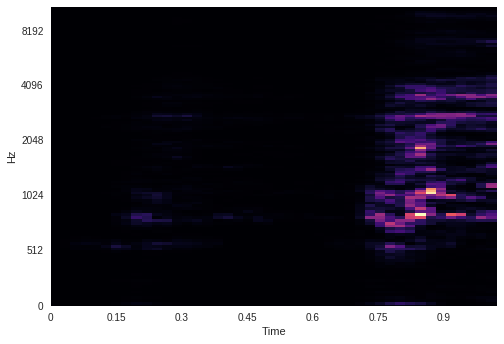

In [0]:
pr=librosa.feature.melspectrogram(y=y,sr=s)

librosa.display.specshow(pr, y_axis='mel', x_axis='time')
pr.shape

In [0]:
d=[]
for i in range(0,train_db.shape[0]):
  y,sr=librosa.load(train_db['file_path'][i], duration=2.97)
  pr=librosa.feature.melspectrogram(y=y,sr=sr)
  if pr.shape==(128,128):
    d.append((pr, train_db['Class'][i]))
    


In [0]:
print('train: ', train_db.shape[0])
print('2.97 data: ', len(d))

In [0]:
dataset=d
random.shuffle(dataset)

x_train,y_train=zip(*dataset[:3000])
x_test, y_test =zip(*dataset[3000:])
#print(x)

In [0]:
pd.Series(y_train).value_counts()

In [0]:

x_train=np.array([i.reshape(128,128,1) for i in x_train])
x_test=np.array([i.reshape(128,128,1) for i in x_test])
leb=LabelEncoder()
y_train=np.array(leb.fit_transform(y_train))
y_test=np.array(leb.fit_transform(y_test))

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(24,(5,5),strides=(1,1),input_shape=(128,128,1)))
model.add(keras.layers.MaxPooling2D((4,2),strides=(4,2)))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Conv2D(48,(5,5),strides=(1,1),padding="valid"))
model.add(keras.layers.MaxPooling2D((4,2), strides=(4,2)))
model.add(keras.layers.Activation('relu'))


model.add(keras.layers.Conv2D(48,(5,5),strides=(1,1),padding="valid"))
model.add(keras.layers.Activation('relu'))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(64))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(10 , activation='softmax'))



In [0]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=20, batch_size=128)
score= model.evaluate(x=x_test, y=y_test)

print('loss:', score[0])
print('accuracy: ', score[1])

**Data argumentation will be done in the Revision**

1. Vary Time
  y, sr = librosa.load('code/UrbanSound8K/audio/fold1/14113-4-0-1.wav', duration=2.97)
  y_changed = librosa.effects.time_stretch(y, rate=0.81)
  librosa.output.write_wav('code/augmented/fold1/speed_81/14113-4-0-1.wav' ,y_changed, sr)
  
  rate = 1.07 # replace with 0.81 and execute again

  for row in valid_data.itertuples():
      y, sr = librosa.load('code/UrbanSound8K/audio/' + row.path)  
      y_changed = librosa.effects.time_stretch(y, rate=rate)
      librosa.output.write_wav('code/augmented/fold' + str(row.fold) + '/speed_' + str(int(rate*100)) + '/' + row.slice_file_name ,y_changed, sr)
      
2. Vary pitch
    n_steps = 2 #-1, -2, 2, 1

    for row in valid_data.itertuples():
        y, sr = librosa.load('code/UrbanSound8K/audio/' + row.path)  
        y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
        librosa.output.write_wav('code/augmented/fold' + str(row.fold) + '/ps1_' + str(int(n_steps)) + '/' + row.slice_file_name ,y_changed, sr)
        
        
3. Change Pitch (PS2)
  n_steps = 2.5 #-2.5, -3.5, 2.5, 3.5
 